In [1]:
!pip install tqdm --quiet

In [2]:
cd ..

/home/jovyan/UCLA_CSX_450_2_2018_W-1/12-wholesale_customers-4


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import lib.visuals as vs

%matplotlib inline

In [4]:
run src/load_data.py

In [5]:
whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
customer_df          DataFrame         Fresh   Milk  Grocer<...>n\n[440 rows x 6 columns]
customer_final_df    DataFrame            Fresh      Milk  <...>n\n[435 rows x 6 columns]
customer_log_df      DataFrame             Fresh       Milk<...>n\n[440 rows x 6 columns]
customer_log_sc_df   DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]
customer_sc_df       DataFrame            Fresh      Milk  <...>n\n[440 rows x 6 columns]


In [6]:
np.random.seed(42)

sample_df = customer_final_df.sample(5)
sample_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
285,1.273141,-1.536573,-0.228089,-0.275900,-0.416876,-2.883317
81,-2.273184,0.965103,1.020533,-1.291873,1.272290,-1.249410
116,0.400649,-0.267562,-0.291553,0.017198,-0.616071,-0.977898
258,1.498892,0.281951,-0.703149,1.143766,-0.115584,1.111985
329,-0.131439,-0.756990,-0.010698,0.967911,-0.346264,-0.049861


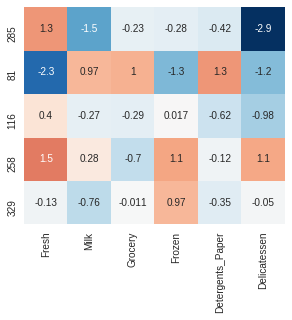

In [7]:
sns.heatmap(sample_df, annot=True, cbar=False, square=True)

In [8]:
customer_df.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [9]:
customer_df.iloc[[285, 81, 116, 258, 329]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
285,40254,640,3600,1042,436,18
81,219,9540,14403,283,7818,156
116,11173,2521,3355,1517,310,222
258,56083,4563,2124,6422,730,3321
329,5113,1486,4583,5127,492,739


### Bar Plots of Samples

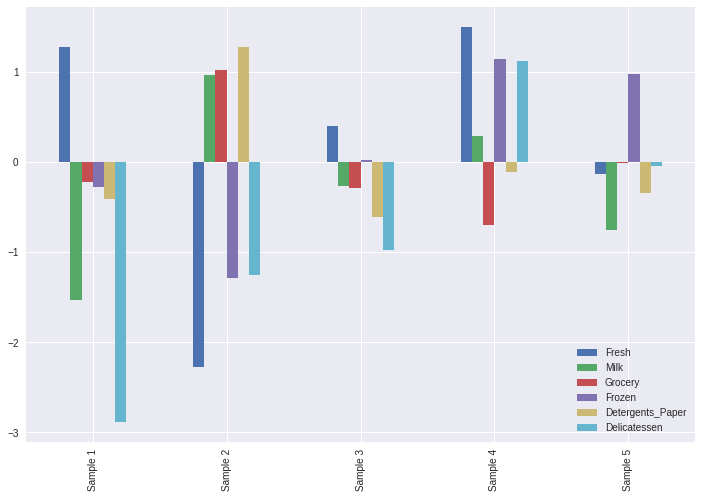

In [10]:
sample_df.plot(kind='bar', figsize=(12,8))
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

## Principal Component Analysis

In [11]:
pca = PCA()
pca.fit(customer_final_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Scree Plot

Look for "the bend". This will tell you how many components to keep.

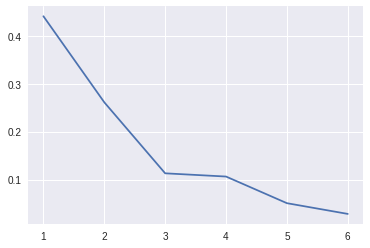

In [12]:
plt.plot( range(1, 7), pca.explained_variance_ratio_)

In [40]:
customer_log_sc_df.cov()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.002278,-0.021144,-0.133292,0.387138,-0.159068,0.257026
Milk,-0.021144,1.002278,0.762861,-0.055354,0.680271,0.343090
Grocery,-0.133292,0.762861,1.002278,-0.164900,0.798957,0.240544
Frozen,0.387138,-0.055354,-0.164900,1.002278,-0.213256,0.256902
Detergents_Paper,-0.159068,0.680271,0.798957,-0.213256,1.002278,0.167955
Delicatessen,0.257026,0.343090,0.240544,0.256902,0.167955,1.002278


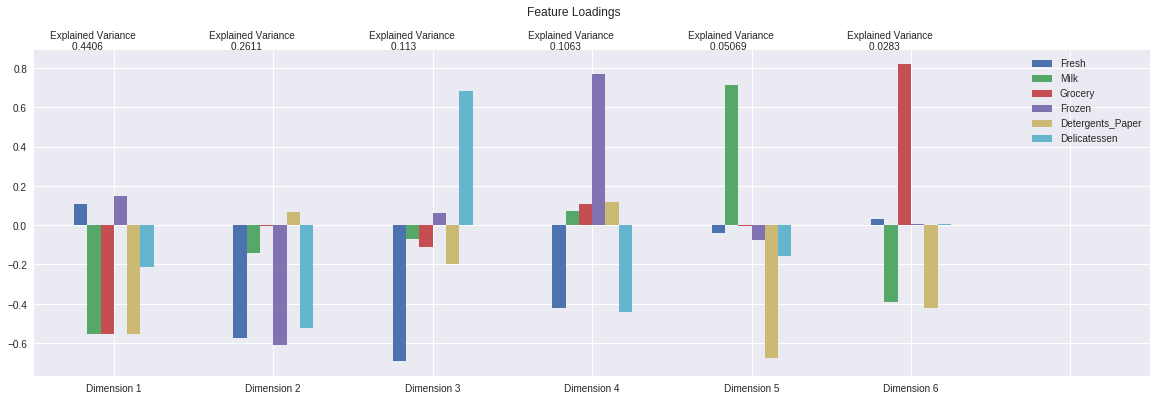

In [41]:
flplot = vs.FeatureLoadingsPlot(customer_final_df, pca, 6)
flplot.display_segments()

In [28]:
pca_2 = PCA(n_components=2)
pca_2.fit(customer_final_df)
pca_4 = PCA(n_components=4)
pca_4.fit(customer_final_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
customer_pca_2_df = pd.DataFrame(pca_2.transform(customer_final_df), 
                               columns=['Dimension 1', 'Dimension 2'],
                               index=customer_final_df.index)
customer_pca_4_df = pd.DataFrame(pca_4.transform(customer_final_df), 
                               columns=['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'],
                               index=customer_final_df.index)
sample_pca_2_df = pd.DataFrame(pca_2.transform(sample_df), 
                             columns=['Dimension 1', 'Dimension 2'],
                             index=sample_df.index)
sample_pca_4_df = pd.DataFrame(pca_4.transform(sample_df), 
                             columns=['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'],
                             index=sample_df.index)

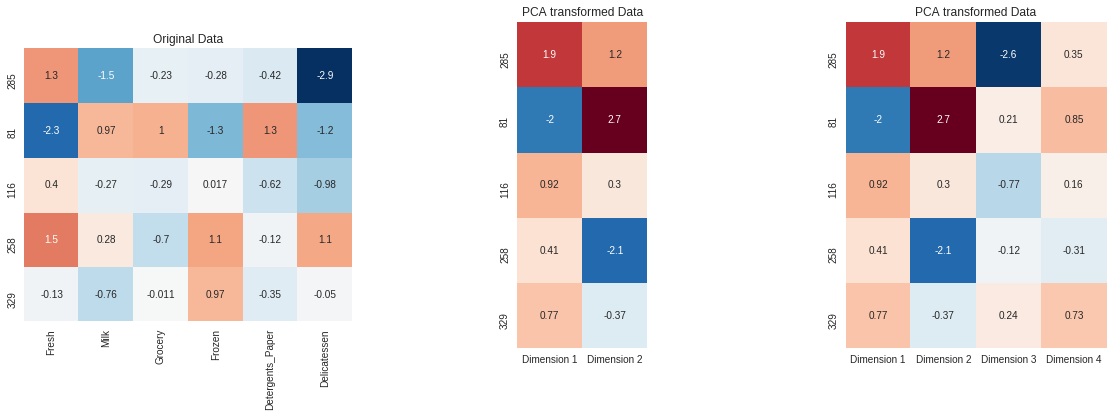

In [30]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(131)
plt.title("Original Data")
sns.heatmap(sample_df, annot=True, cbar=False, square=True)
fig.add_subplot(132)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_2_df, annot=True, cbar=False, square=True)
fig.add_subplot(133)
plt.title("PCA transformed Data")
sns.heatmap(sample_pca_4_df, annot=True, cbar=False, square=True)

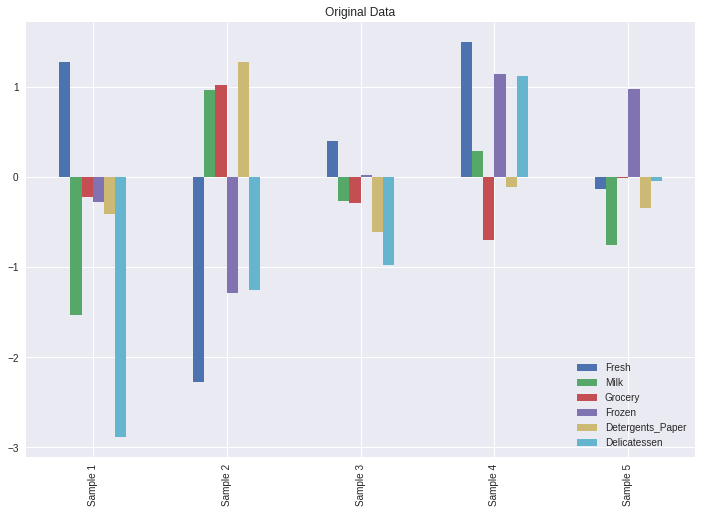

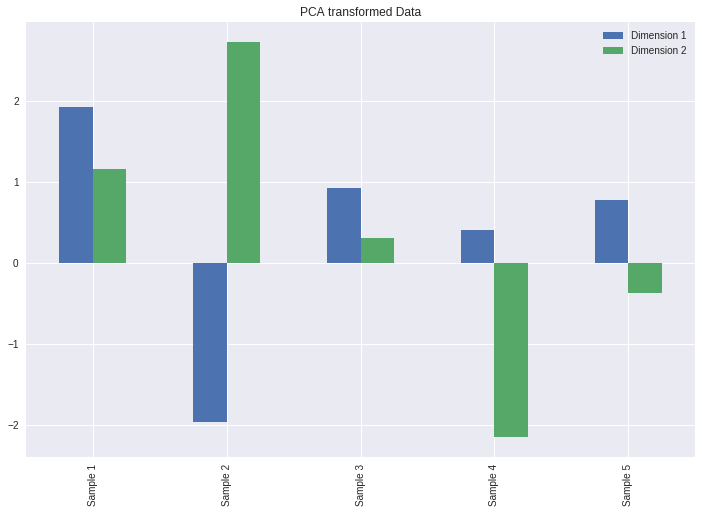

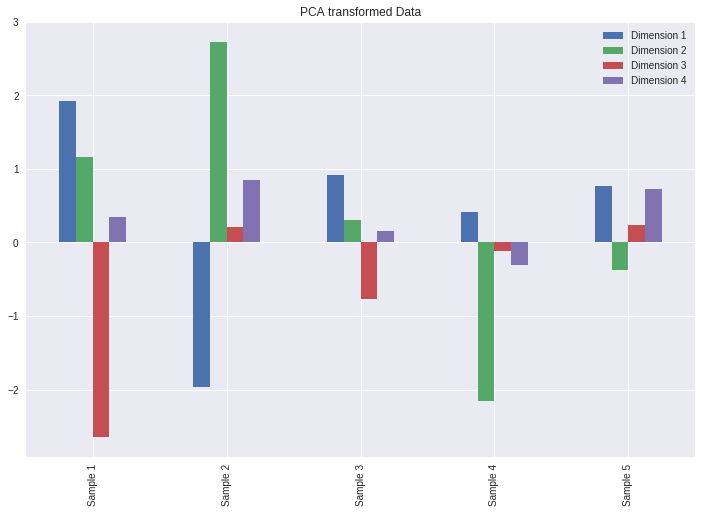

In [31]:
sample_df.plot(kind='bar', figsize=(12,8))
plt.title("Original Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_2_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

sample_pca_4_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

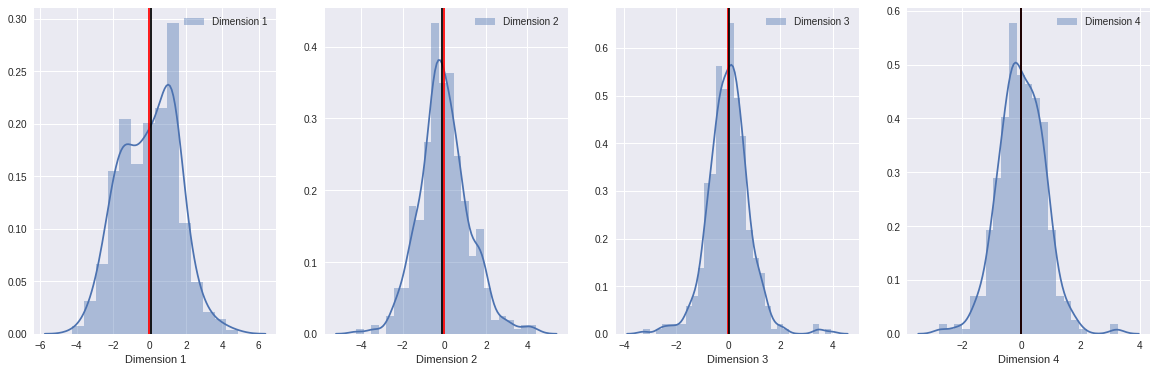

In [32]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(customer_pca_4_df.columns):
    fig.add_subplot(141+i)
    sns.distplot(customer_pca_4_df[col], label=col)
    plt.axvline(customer_pca_4_df[col].mean(), c='red')
    plt.axvline(customer_pca_4_df[col].median(), c='black')
    plt.legend()

 60%|██████    | 3/5 [00:00<00:00, 25.04it/s]

For n_clusters = 2 the silhouette score is 0.41530721674546195.
For n_clusters = 3 the silhouette score is 0.3980867022929386.
For n_clusters = 4 the silhouette score is 0.3372254306537112.
For n_clusters = 5 the silhouette score is 0.35241373233850404.


100%|██████████| 5/5 [00:00<00:00, 21.25it/s]


For n_clusters = 6 the silhouette score is 0.35929261117324734.


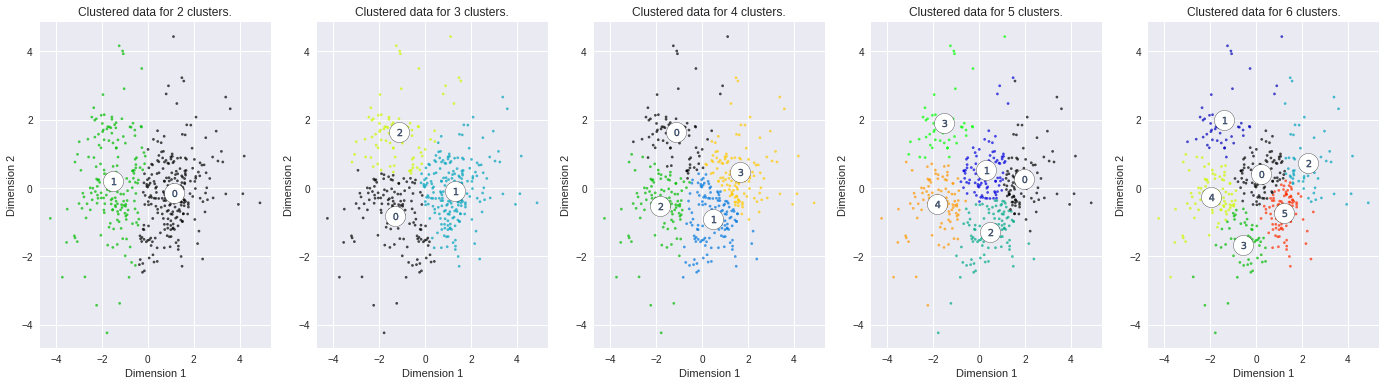

In [33]:
pca_2_clusters = vs.Clusters(customer_pca_2_df, range(2,7))
pca_2_clusters.cluster_plots()

100%|██████████| 4/4 [00:00<00:00, 22.85it/s]


For n_clusters = 2 the silhouette score is 0.3198776075302336.
For n_clusters = 3 the silhouette score is 0.28060436052775395.
For n_clusters = 4 the silhouette score is 0.21101751924833187.
For n_clusters = 5 the silhouette score is 0.22282914610408372.


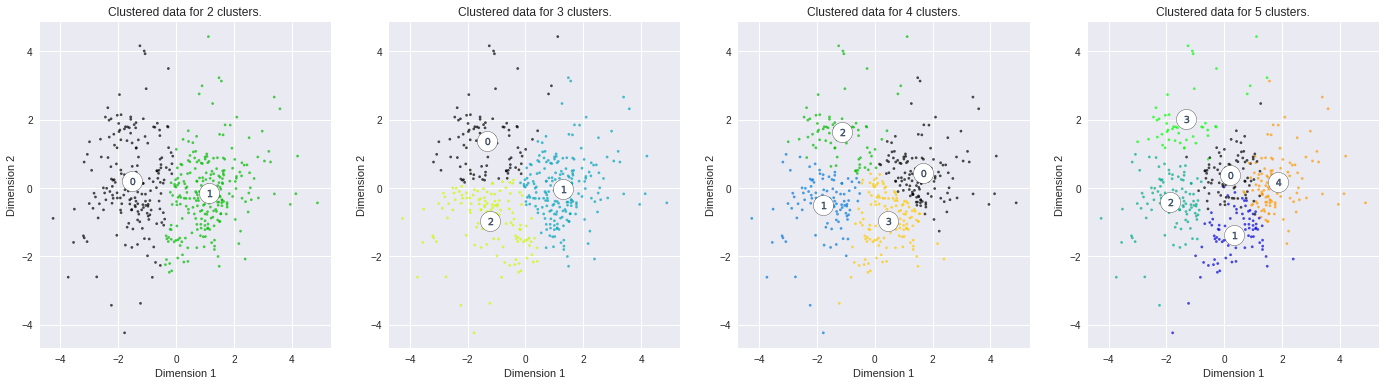

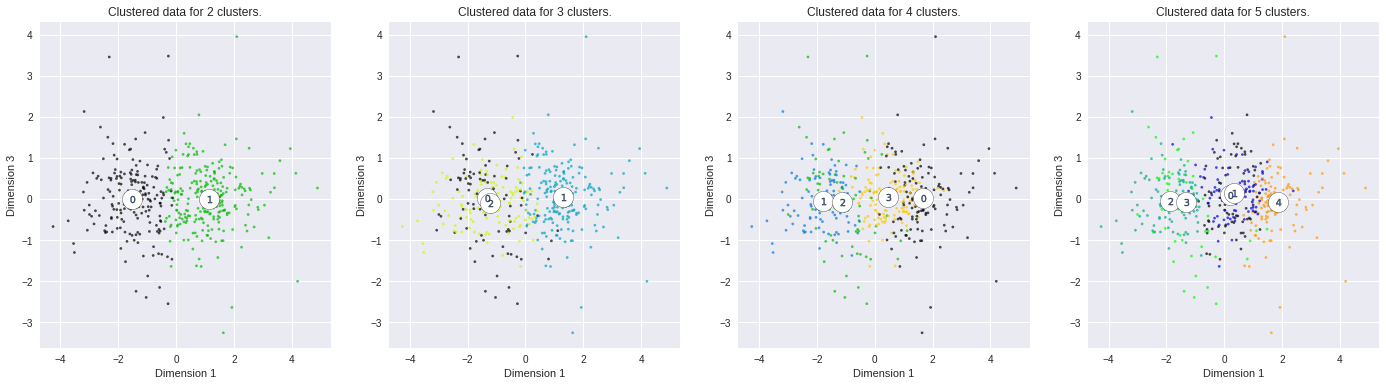

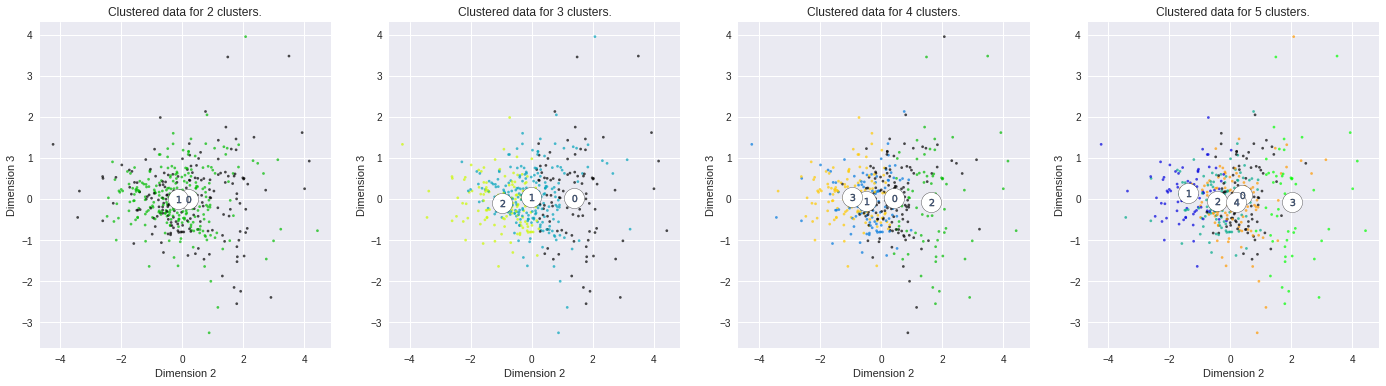

In [34]:
pca_4_clusters = vs.Clusters(customer_pca_4_df, range(2,6))
pca_4_clusters.cluster_plots(1,2)
pca_4_clusters.cluster_plots(1,3)
pca_4_clusters.cluster_plots(2,3)

100%|██████████| 2/2 [00:00<00:00, 25.78it/s]


For n_clusters = 2 the silhouette score is 0.3198776075302336.
For n_clusters = 3 the silhouette score is 0.28060436052775395.


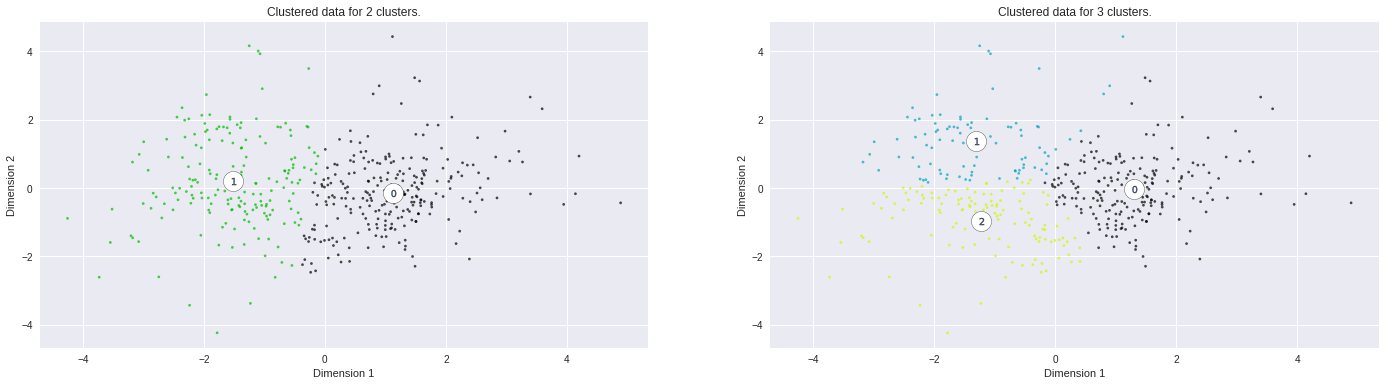

In [45]:
pca_4_clusters = vs.Clusters(customer_pca_4_df, range(2,4))
pca_4_clusters.cluster_plots()

100%|██████████| 3/3 [00:00<00:00, 24.09it/s]


For n_clusters = 2 the silhouette score is 0.41530721674546195.
For n_clusters = 3 the silhouette score is 0.3955063518453679.
For n_clusters = 4 the silhouette score is 0.3367800055910117.


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1,

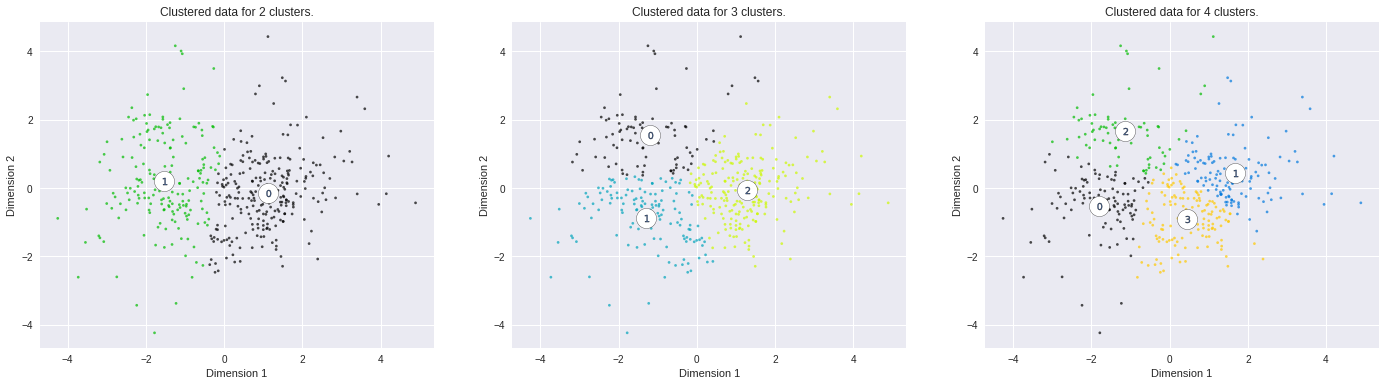

In [49]:
pca_2_clusters = vs.Clusters(customer_pca_2_df, [2,3,4])
pca_2_clusters.cluster_plots()
pca_2_clusters.cluster_labels[2]

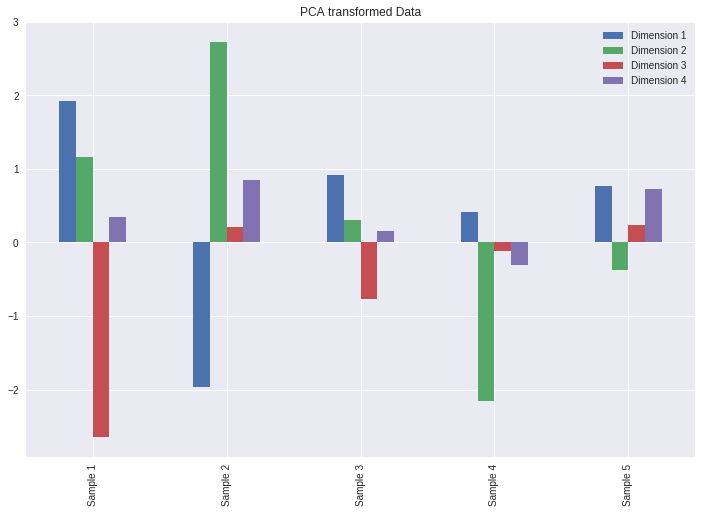

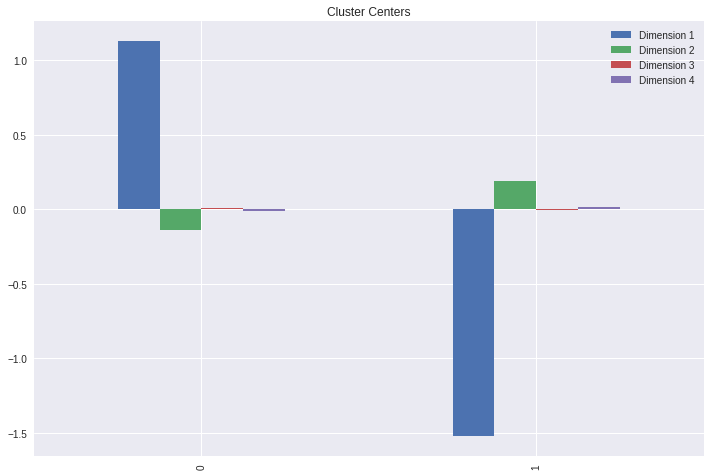

In [36]:
sample_pca_4_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

pca_4_clusters.cluster_centers[2].plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")

# cluster centers are the average in each cluster

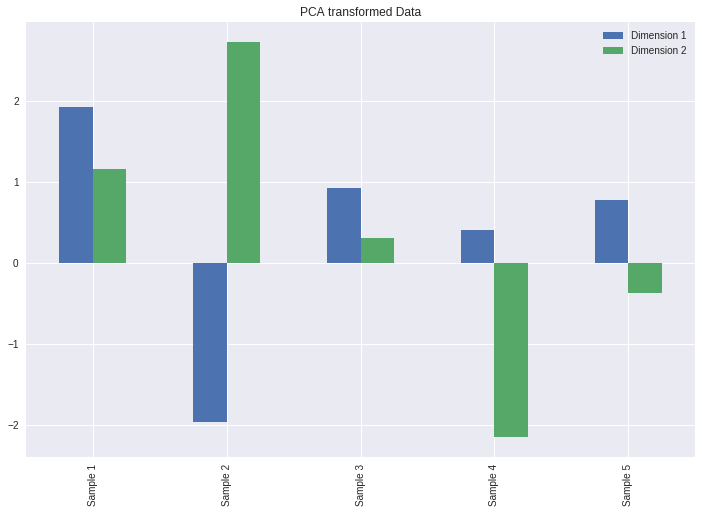

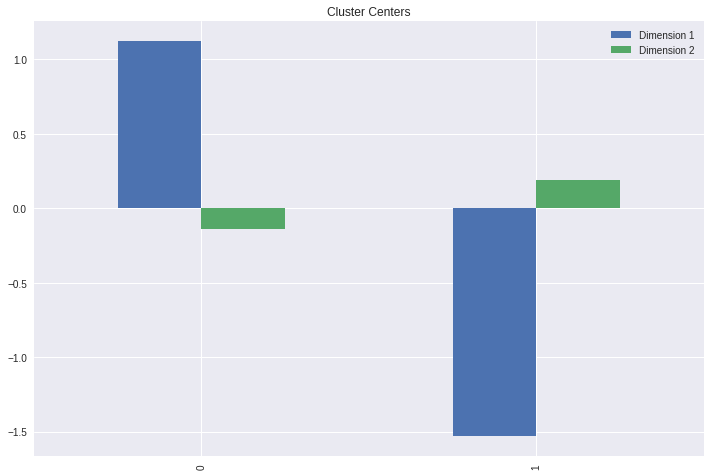

In [37]:
sample_pca_2_df.plot(kind='bar', figsize=(12,8))
plt.title("PCA transformed Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

pca_2_clusters.cluster_centers[2].plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")

In [38]:
inv_transform_clusters = pd.DataFrame(pca_2.inverse_transform(pca_2_clusters.cluster_centers[2]), columns=customer_final_df.columns)

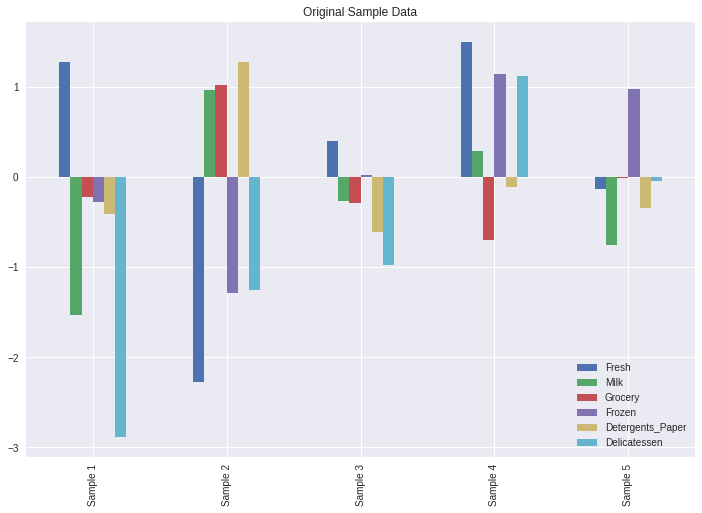

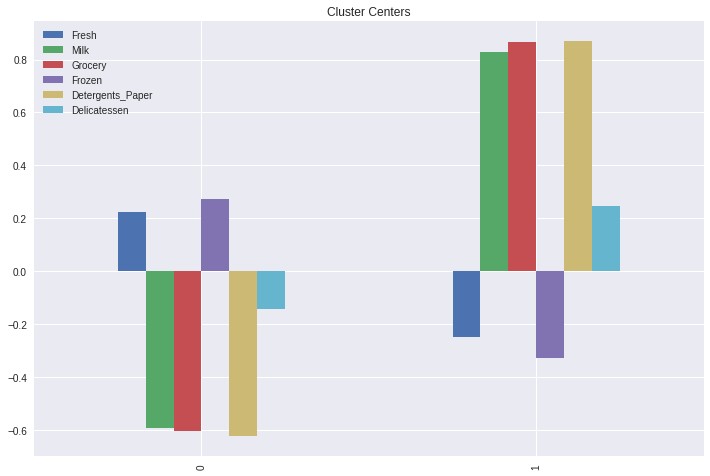

In [39]:
sample_df.plot(kind='bar', figsize=(12,8))
plt.title("Original Sample Data")
_ = plt.xticks(range(5),['Sample 1','Sample 2','Sample 3', 'Sample 4','Sample 5'])

inv_transform_clusters.plot(kind='bar', figsize=(12,8))
plt.title("Cluster Centers")